In [1]:
import face_alignment
from skimage import io
import numpy as np
import pickle
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from pathlib import Path
import cv2
%matplotlib inline

In [2]:
source_dir = Path("data/source/")
source_dir.mkdir(exist_ok=True)

save_dir = Path("data/train/")
save_dir.mkdir(exist_ok=True)

img_dir = save_dir.joinpath("img")
img_dir.mkdir(exist_ok=True)

landmark_dir = save_dir.joinpath("landmark")
landmark_dir.mkdir(exist_ok=True)

landmark_dir_3D = landmark_dir.joinpath("3D")
landmark_dir_3D.mkdir(exist_ok=True)

landmark_dir_label = landmark_dir.joinpath("label")
landmark_dir_label.mkdir(exist_ok=True)

In [3]:
vid = "4.mp4"
input_size = (512, 512)

vid_name, _ = vid.split(".")

cap = cv2.VideoCapture(str(source_dir.joinpath(vid)))

if len(os.listdir(str(img_dir)))<100:
    count = 0
    while cap.isOpened():
        flag, frame = cap.read()
        if flag == False:
            break
        shape_dst = np.min(frame.shape[:2])
        oh = (frame.shape[0] - shape_dst) // 2
        ow = (frame.shape[1] - shape_dst) // 2
        
        img = frame[oh:oh+shape_dst, ow:ow+shape_dst]
        img = cv2.resize(img, input_size)
        img_name = vid_name+"_{:05}.jpg".format(count)
        
        cv2.imwrite(str(img_dir.joinpath(img_name)), img)
        if count % 20 == 0:
            print("Read frames : %d" %count)
            plt.imshow(img[:, :, [2, 1, 0]])
            plt.show()
        count += 1

In [4]:
pickle_name = "preds.pkl"

if pickle_name in os.listdir(str(save_dir)):
    preds = pickle.load(open(str(save_dir.joinpath(pickle_name)), "rb"))
    
else:
    fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._3D, flip_input=False)
    preds = fa.get_landmarks_from_directory(str(img_dir))
    pickle.dump(preds, open(str(save_dir.joinpath(pickle_name)), "wb"), pickle.HIGHEST_PROTOCOL)
    
for i in preds:
    print(i)
    break

100%|██████████| 146/146 [00:15<00:00,  9.66it/s]


data\train\img\4_00000.jpg


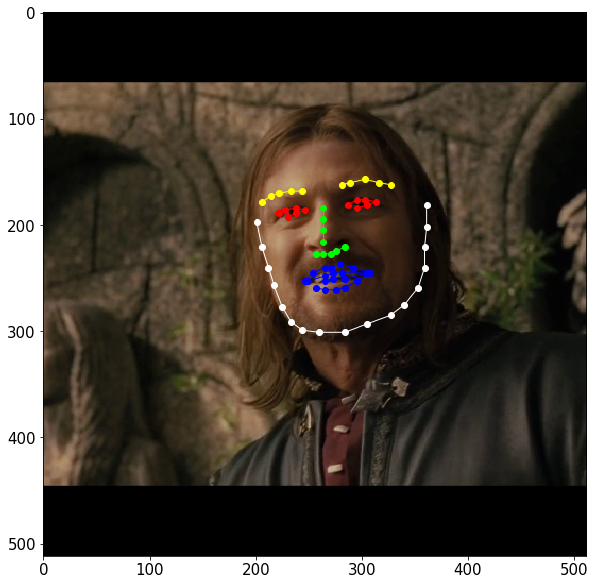

In [5]:
img_num = 80

params={"figure.figsize" : (10, 10),
        "xtick.labelsize" : 15,
        "ytick.labelsize" : 15}
mpl.rcParams.update(params)

colors = {'white' : (255, 255, 255),
         'red' : (255, 0, 0),
         'green' : (0, 255, 0),
         'blue' : (0, 0, 255),
         'yellow' : (255, 255, 0),
         'cyan' : (0, 255, 255),
         'magenta' : (255, 0, 255)}

img_name = img_dir.joinpath(vid_name+"_{:05}.jpg".format(img_num))
pic = preds[str(img_name)]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mpimg.imread(str(img_name)))

lm = {'1' : (np.array(pic[0][0:17,0:2], np.int32), colors['white']), # 턱
      '2' : (np.array(pic[0][17:22,0:2], np.int32), colors['yellow']), # 왼쪽 눈썹
      '3' : (np.array(pic[0][22:27,0:2], np.int32), colors['yellow']), # 오른쪽 눈썹
      '4' : (np.array(pic[0][27:31,0:2], np.int32), colors['green']), # 콧대
      '5' : (np.array(pic[0][31:36,0:2], np.int32), colors['green']), # 콧망울
      '6' : (np.array(pic[0][36:42,0:2], np.int32), colors['red']), # 왼쪽 눈
      '7' : (np.array(pic[0][42:48,0:2], np.int32), colors['red']), # 오른쪽 눈
      '8' : (np.array(pic[0][48:60,0:2], np.int32), colors['blue']), # 바깥쪽 입술
      '9' : (np.array(pic[0][60:68,0:2], np.int32), colors['blue'])} # 안쪽 입술
for v, c in lm.values():
    ax.plot(v[:,0], v[:,1], marker='o', markersize=6, linestyle='-', color=[i/255 for i in c], lw=1)
plt.show()

In [6]:
count = 0

for k, v in preds.items():
    lm = {'1' : (np.array(v[0][0:17,0:2], np.int32), colors['white']), # 턱
          '2' : (np.array(v[0][17:22,0:2], np.int32), colors['yellow']), # 왼쪽 눈썹
          '3' : (np.array(v[0][22:27,0:2], np.int32), colors['yellow']), # 오른쪽 눈썹
          '4' : (np.array(v[0][27:31,0:2], np.int32), colors['green']), # 콧대
          '5' : (np.array(v[0][31:36,0:2], np.int32), colors['green']), # 콧망울
          '6' : (np.array(v[0][36:42,0:2], np.int32), colors['red']), # 왼쪽 눈
          '7' : (np.array(v[0][42:48,0:2], np.int32), colors['red']), # 오른쪽 눈
          '8' : (np.array(v[0][48:60,0:2], np.int32), colors['blue']), # 바깥쪽 입술
          '9' : (np.array(v[0][60:68,0:2], np.int32), colors['blue'])} # 안쪽 입술
    
    label = np.zeros((input_size[0], input_size[1], 3), np.uint8)
    for mark, color in lm.values():
        cv2.polylines(img=label, pts=[mark], isClosed=False, color=color[::-1], thickness=3)        
    cv2.imwrite(str(landmark_dir_label.joinpath(k.split("\\")[-1])),label)
    
    if count % 20 == 0:
        print("Make label : %d" %count)        
    count += 1

Make label : 0
Make label : 20
Make label : 40
Make label : 60
Make label : 80
Make label : 100
Make label : 120
Make label : 140


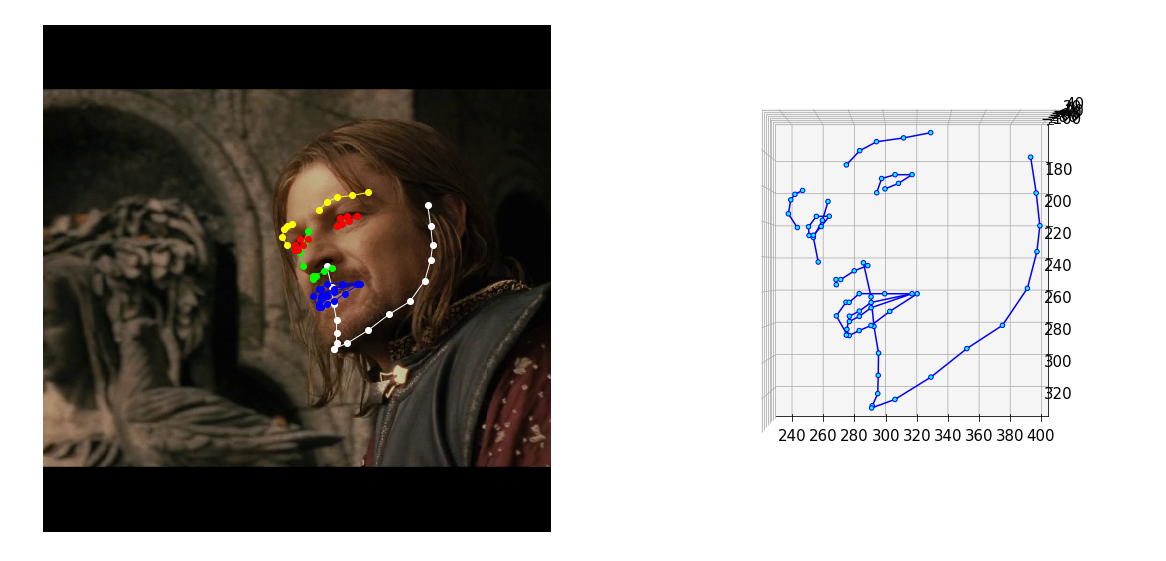

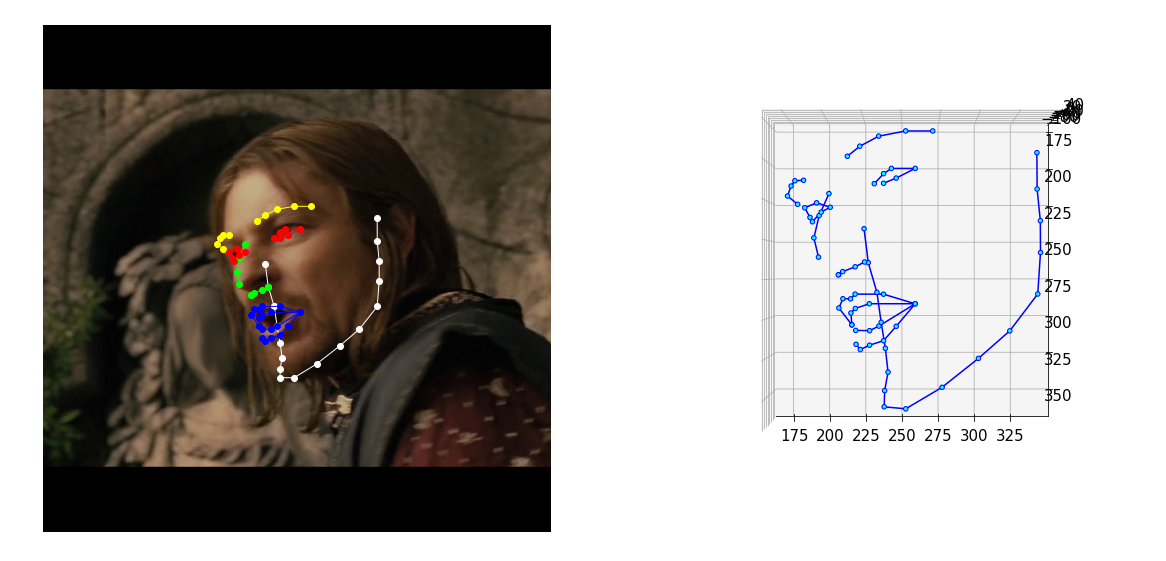

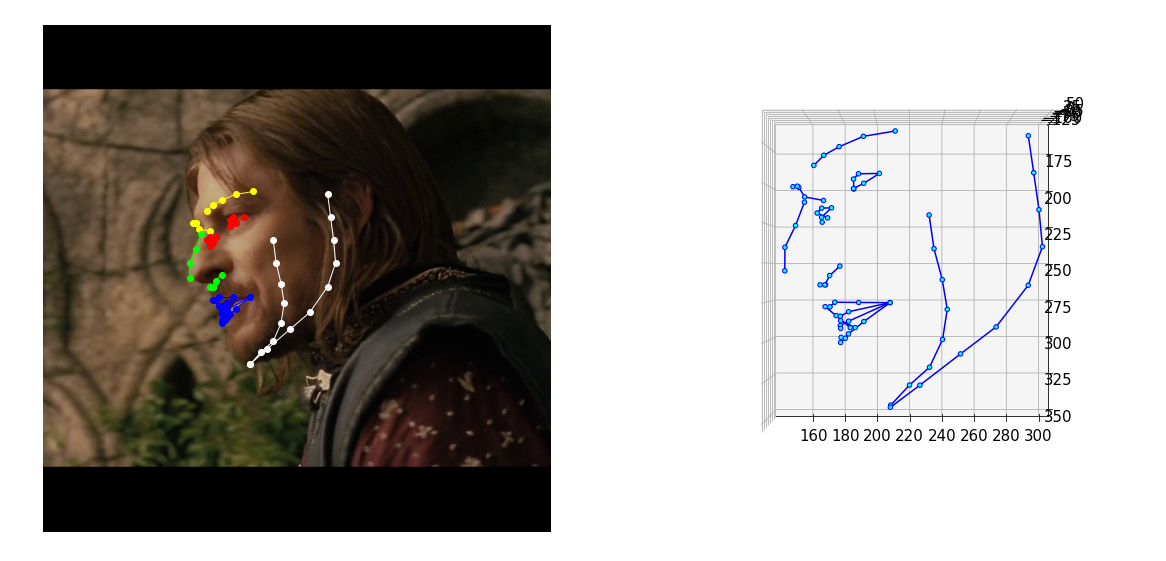

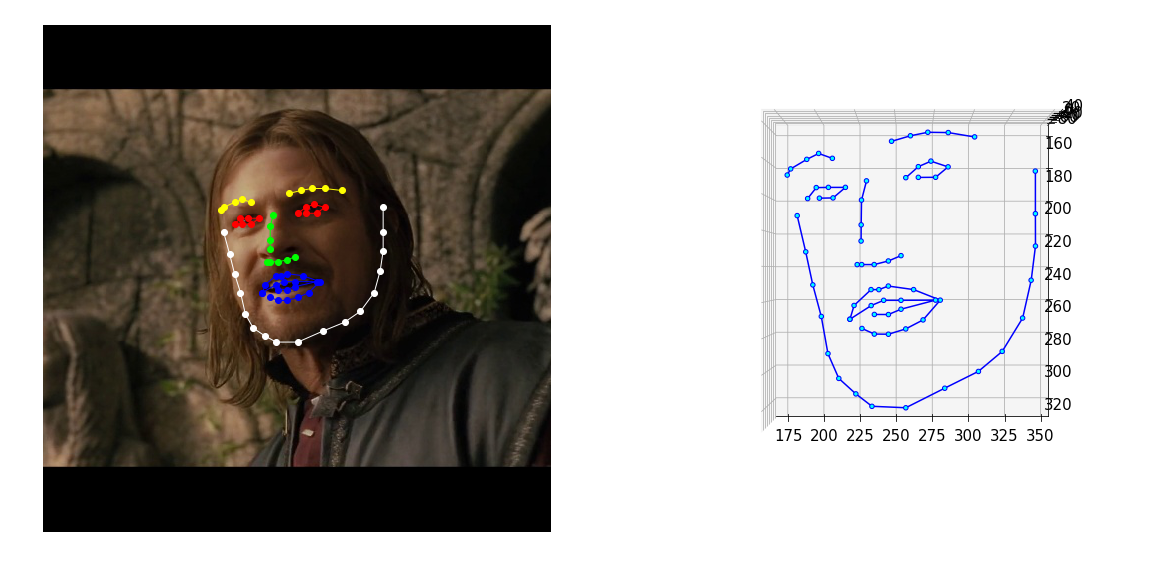

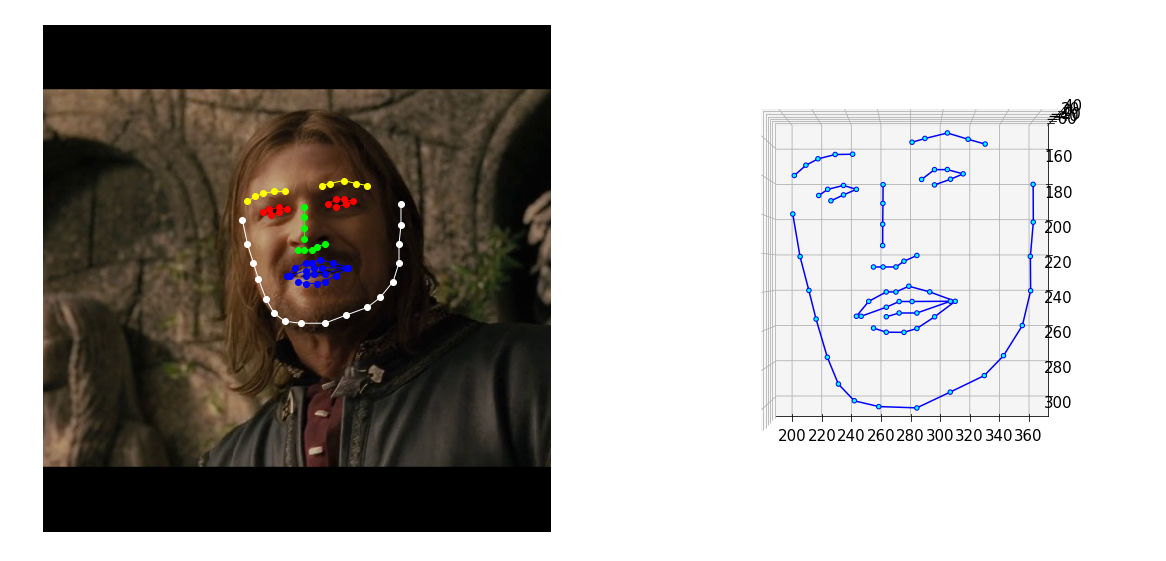

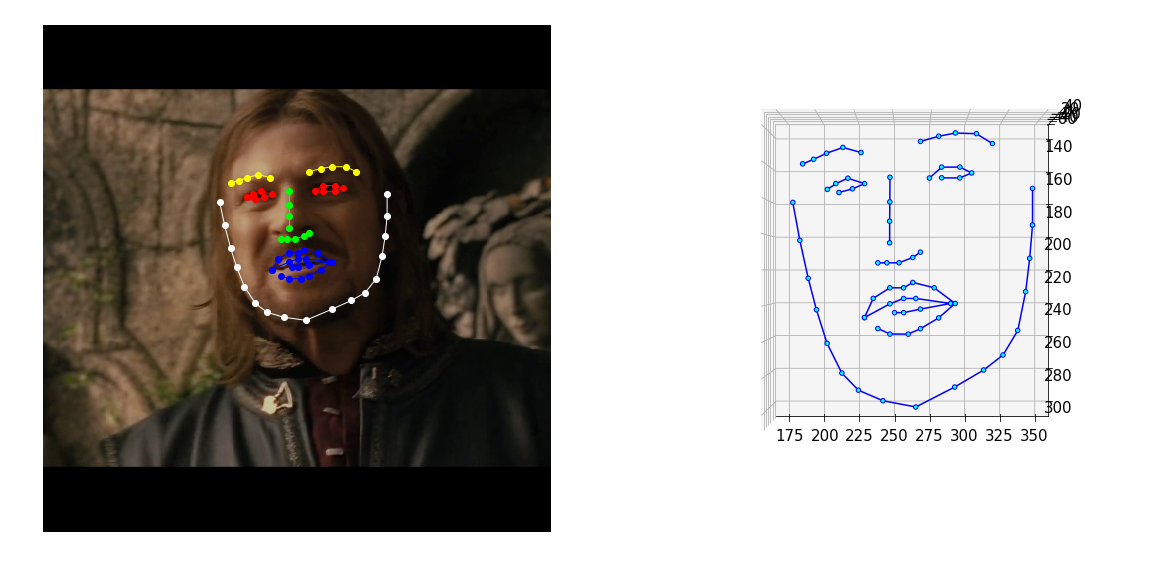

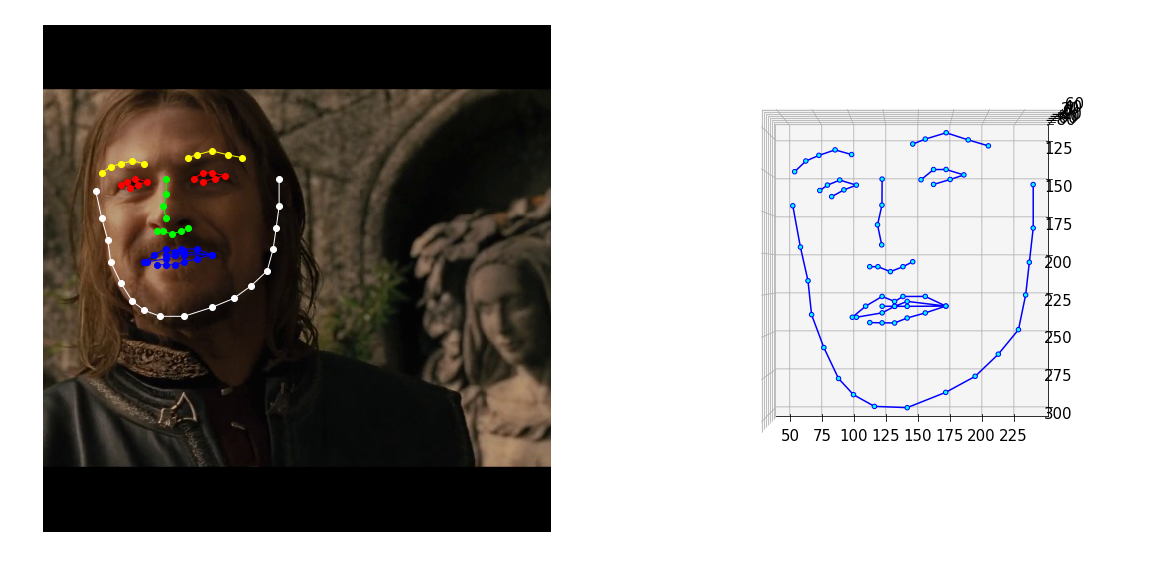

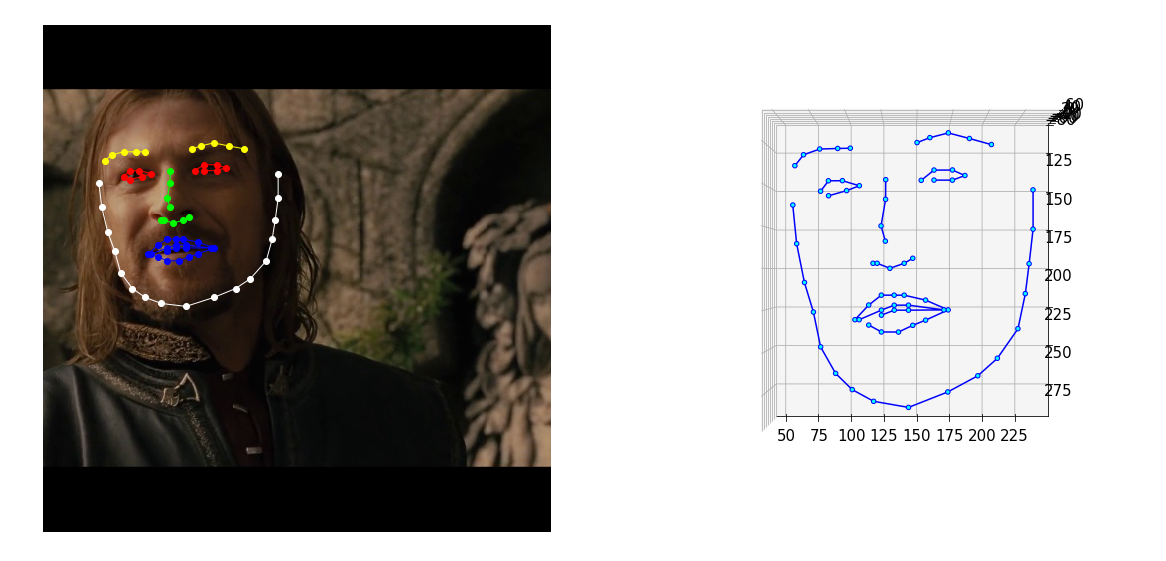

In [7]:
params={"figure.figsize" : (20, 10),
        "xtick.labelsize" : 15,
        "ytick.labelsize" : 15}
mpl.rcParams.update(params)

count = 0
for k, v in preds.items():
    fig = plt.figure()
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(mpimg.imread(k))
    
    lm = {'1' : (np.array(v[0][0:17,:], np.int32), colors['white']), # 턱
          '2' : (np.array(v[0][17:22,:], np.int32), colors['yellow']), # 왼쪽 눈썹
          '3' : (np.array(v[0][22:27,:], np.int32), colors['yellow']), # 오른쪽 눈썹
          '4' : (np.array(v[0][27:31,:], np.int32), colors['green']), # 콧대
          '5' : (np.array(v[0][31:36,:], np.int32), colors['green']), # 콧망울
          '6' : (np.array(v[0][36:42,:], np.int32), colors['red']), # 왼쪽 눈
          '7' : (np.array(v[0][42:48,:], np.int32), colors['red']), # 오른쪽 눈
          '8' : (np.array(v[0][48:60,:], np.int32), colors['blue']), # 바깥쪽 입술
          '9' : (np.array(v[0][60:68,:], np.int32), colors['blue'])} # 안쪽 입술
    
    for mark, color in lm.values():
        ax.plot(mark[:,0], mark[:,1], marker='o', markersize=6, linestyle='-', color=[i/255 for i in color], lw=1)
    ax.axis('off')

    ax = fig.add_subplot(1, 2, 2, projection='3d')
    surf = ax.scatter(v[0][:,0], v[0][:,1], v[0][:,2], c="cyan", alpha=1.0, edgecolor='b')
    for mark, color in lm.values():
        ax.plot3D(mark[:,0], mark[:,1], mark[:,2], color='blue')
        
    ax.view_init(elev=90., azim=90.)
    ax.set_xlim(ax.get_xlim()[::-1])
    plt.savefig(str(landmark_dir_3D.joinpath(k.split("\\")[-1])))    
    
    if count%20==0:
        plt.show()
    count += 1
    
    plt.close(fig)